## 一、线性回归

**1.1 正规方程**

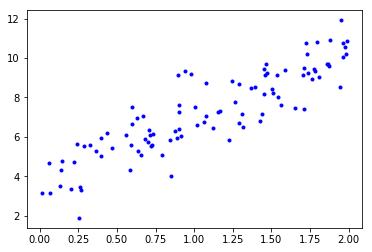

In [1]:
# 生成线性数据
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1) # .rand()生成给定形状的随机值
y = 4 + 3 * X + np.random.randn(100, 1) # .randn()生成服从正态分布的样本
%matplotlib inline
plt.plot(X, y, "b.")

In [2]:
# 用正规方程，估计参数
X_b = np.c_[np.ones((100,1)), X] # 添加全为1的列向量，因为有截距项
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # np.linalg.inv()表示矩阵求逆，A.dot(B)表示点乘

In [3]:
theta_best

array([[3.69461549],
       [3.28858261]])

In [4]:
# 用参数估计值做预测
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.69461549],
       [10.27178071]])

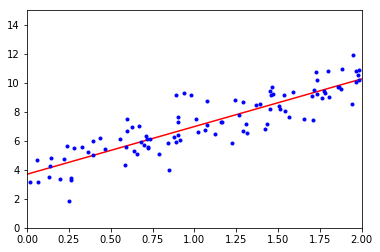

In [5]:
# 画出模型的预测
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
# 用Scikit-Learn进行估计
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # intercept_表示截距项，coef_表示系数

(array([3.69461549]), array([[3.28858261]]))

In [7]:
lin_reg.predict(X_new)

array([[ 3.69461549],
       [10.27178071]])

**1.2 计算复杂性**  
当特征数目变得很大（列如100000）时，正规方程将变得非常慢

## 二、梯度下降
迭代地调整参数使损失函数最小化

**2.1 批量梯度下降**

In [8]:
# 执行批量梯度下降算法
eta = 0.1 # 学习速率
n_iterations = 1000 #迭代次数
m = 100 # 样本数

theta = np.random.randn(2, 1) # 参数随机初始化

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta -= eta * gradients

In [9]:
theta

array([[3.69461549],
       [3.28858261]])

**2.2 随机梯度下降**

In [10]:
# 用一个简单的学习计划执行随机梯度下降
n_epochs = 50
t0, t1 = 5, 50 # 学习计划超参数

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # 随机初始化

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [11]:
theta

array([[3.70112536],
       [3.33416003]])

In [12]:
# 用Scikit-Learn中的SGDRegressor，执行线性回归
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) # .ravel()将y变为一维

C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.7124931]), array([3.31446783]))

**2.3 小批量梯度下降**  
每一步计算梯度不是基于整个数据集，也不是基于仅一个样本，而是基于一小部分随机的样本集

## 三、多项式回归

In [14]:
# 基于二次方程式生成一些非线性数据
m = 100
X = 6 * np.random.rand(m, 1) - 3 # .rand()生成[0,1)之间的数字
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [15]:
# 产生多项式，并且多项式包含的是相互影响的特征集
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False) # degree为多项式的阶数
X_poly = poly_features.fit_transform(X)

In [16]:
X[0]

array([1.28995167])

In [17]:
X_poly[0]

array([1.28995167, 1.66397532])

In [18]:
# 现在X_poly包含了原始特征，加上特征的平方，现在用线性回归来拟合
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
lin_reg.intercept_, lin_reg.coef_

(array([2.31827918]), array([[0.98529828, 0.44791348]]))

## 四、学习曲线

In [20]:
# 画学习曲线，即模型在训练集和验证集的性能关于训练集规模的函数
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.axis([0, 80, 0, 3])
    plt.show()

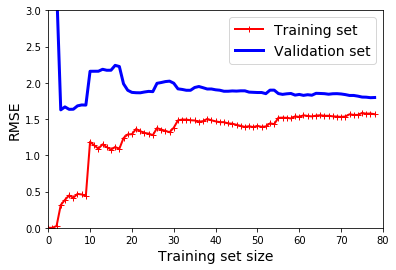

In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

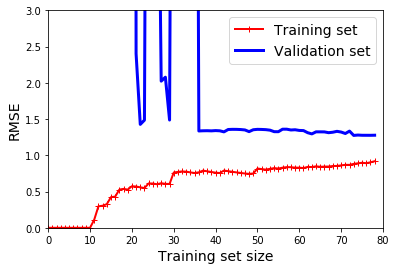

In [22]:
# 在相同的数据上，观察十阶多项式模型
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ))

plot_learning_curves(polynomial_regression, X, y)

## 五、正则化的线性模型

**5.1 岭回归**

In [23]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [24]:
ridge_reg.predict([[1.5]])

array([[5.20389376]])

In [25]:
sgd_reg = SGDRegressor(penalty="l2") # 随机梯度下降回归
sgd_reg.fit(X, y.ravel())

C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [26]:
sgd_reg.predict([[1.5]])

array([4.37856787])

**5.2 套索回归**

In [27]:
from sklearn.linear_model import Lasso # 可用SGDRegressor(penalty="l1")代替
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
lasso_reg.predict([[1.5]])

array([5.16343956])

**5.3 弹性网络**

In [29]:
# 介于岭回归和套索回归之间
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
elastic_net.predict([[1.5]])

array([5.16338964])

**5.4 提前停止**

In [31]:
# 在验证误差到达最小值时停止训练
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)


sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                      learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf") # 或者np.inf
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # 仅在终止的地方继续
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_peoch = epoch
        best_model = clone(sgd_reg)

In [32]:
best_model

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=True)

## 六、逻辑回归

**6.1 估计概率**  
用sigmoid函数计算概率值

**6.2 训练和损失函数**  
因为没有可知的封闭方程，所以无法计算出是损失函数最小化的参数值  
但是，由于损失函数是凸的，所以可以用梯度下降法去找到全局最小值

**6.3 决策边界**

In [33]:
# 导入Iris数据集
from sklearn import datasets

iris = datasets.load_iris()

In [34]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [35]:
X = iris["data"][:,3:] #只取了petal width这个特征
y = (iris["target"] == 2).astype(np.int)

In [36]:
# 训练逻辑回归模型
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Text(0,0.5,'Probability')

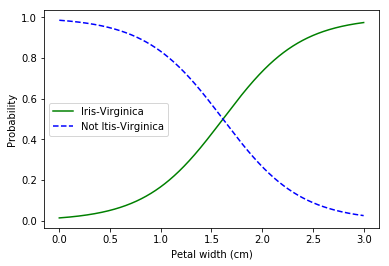

In [37]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # linspace表示：在指定的间隔内返回均匀间隔的数字
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Itis-Virginica")
plt.legend(loc="center left", fontsize=10)
plt.xlabel("Petal width (cm)", fontsize=10)
plt.ylabel("Probability", fontsize=10)

In [38]:
log_reg.predict([[1.7], [1.5], [1.4]])

array([1, 0, 0])

**6.4 Softmax回归**

In [39]:
X = iris["data"][:, (2,3)] # 两个特征petal length, peta width
y = iris["target"]

In [40]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
softmax_reg.predict([[5, 2]])

array([2])

In [42]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])